<H3>Load libraries</H3>

In [1]:
import numpy as np
import os
from scipy.misc import imread, imsave, imresize, imshow
import random
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
import gc
from sklearn.cross_validation import train_test_split

import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

In [2]:
train = pd.read_csv('train_part\\7\\X_train_7.csv')

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.drop(train.columns[[0,1,2,6,7]], axis = 1, inplace = True)
train.drop('PH', axis=1, inplace=True)

In [4]:
train['Month1']=np.where(train['Month']==1.0, 1,0)
train['Month2']=np.where(train['Month']==2.0, 1,0)
train['Month3']=np.where(train['Month']==3.0, 1,0)
train['Month4']=np.where(train['Month']==4.0, 1,0)
train['Month5']=np.where(train['Month']==5.0, 1,0)
train['Month6']=np.where(train['Month']==6.0, 1,0)
train['Month7']=np.where(train['Month']==7.0, 1,0)
train['Month8']=np.where(train['Month']==8.0, 1,0)
train['Month9']=np.where(train['Month']==9.0, 1,0)
train['Month10']=np.where(train['Month']==10.0, 1,0)
train['Month11']=np.where(train['Month']==11.0, 1,0)
train['Month12']=np.where(train['Month']==12.0, 1,0)
train['Hour1']=np.where(train['Hour']==1.0, 1,0)
train['Hour2']=np.where(train['Hour']==2.0, 1,0)
train['Hour3']=np.where(train['Hour']==3.0, 1,0)
train['Hour4']=np.where(train['Hour']==4.0, 1,0)
train['Hour5']=np.where(train['Hour']==5.0, 1,0)
train['Hour6']=np.where(train['Hour']==6.0, 1,0)
train['Hour7']=np.where(train['Hour']==7.0, 1,0)
train['Hour8']=np.where(train['Hour']==8.0, 1,0)
train['Hour9']=np.where(train['Hour']==9.0, 1,0)
train['Hour10']=np.where(train['Hour']==10.0, 1,0)
train['Hour11']=np.where(train['Hour']==11.0, 1,0)
train['Hour12']=np.where(train['Hour']==12.0, 1,0)
train['Hour13']=np.where(train['Hour']==13.0, 1,0)
train['Hour14']=np.where(train['Hour']==14.0, 1,0)
train['Hour15']=np.where(train['Hour']==15.0, 1,0)
train['Hour16']=np.where(train['Hour']==16.0, 1,0)
train['Hour17']=np.where(train['Hour']==17.0, 1,0)
train['Hour18']=np.where(train['Hour']==18.0, 1,0)
train['Hour19']=np.where(train['Hour']==19.0, 1,0)
train['Hour20']=np.where(train['Hour']==20.0, 1,0)
train['Hour21']=np.where(train['Hour']==21.0, 1,0)
train['Hour22']=np.where(train['Hour']==22.0, 1,0)
train['Hour23']=np.where(train['Hour']==23.0, 1,0)
train['Hour24']=np.where(train['Hour']==24.0, 1,0)

In [5]:
train.drop('Month', axis = 1, inplace = True)
train.drop('Hour', axis = 1, inplace = True)

In [6]:
y = train.pop('FF')

In [7]:
xtrain2, xtrain1, y2, y1 = train_test_split(train, y, test_size = 0.2, random_state = 2016)

In [8]:
xgtrain1 = xgb.DMatrix(xtrain1, label = y1)

In [9]:
xgtrain2 = xgb.DMatrix(xtrain2, label = y2)

<H3>Train the model</H3>

In [10]:
params = {}
params["objective"] = "reg:linear"
params["booster"] = "gbtree"
params["max_depth"] = 6
params["eval_metric"] = 'rmse'
params["subsample"] = 0.9
params["colsample_bytree"] = 0.9
params["silent"] = 1
params["seed"] = 2016
params["eta"] = 0.1

plst = list(params.items())
num_rounds = 500
early_stopping_rounds = 10

watchlist = [(xgtrain2,'train'),(xgtrain1, 'eval')]

model_7_1 = xgb.train(plst, xgtrain2, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-rmse:1278.67	eval-rmse:1276.16
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:1151.5	eval-rmse:1149.29
[2]	train-rmse:1036.99	eval-rmse:1034.98
[3]	train-rmse:934.009	eval-rmse:932.252
[4]	train-rmse:841.27	eval-rmse:839.727
[5]	train-rmse:757.893	eval-rmse:756.558
[6]	train-rmse:682.847	eval-rmse:681.668
[7]	train-rmse:615.338	eval-rmse:614.322
[8]	train-rmse:554.579	eval-rmse:553.698
[9]	train-rmse:499.925	eval-rmse:499.123
[10]	train-rmse:450.705	eval-rmse:450.087
[11]	train-rmse:406.484	eval-rmse:406.105
[12]	train-rmse:366.784	eval-rmse:366.661
[13]	train-rmse:331.03	eval-rmse:331.195
[14]	train-rmse:298.91	eval-rmse:299.337
[15]	train-rmse:269.947	eval-rmse:270.544
[16]	train-rmse:244.039	eval-rmse:244.924
[17]	train-rmse:220.78	eval-rmse:221.984
[18]	train-rmse:199.86	eval-rmse:201.429
[19]	train-rmse:181.13	eval-rmse:183.104
[20]	train-rmse:164.262	eval-rmse:

In [11]:
xtrain2, xtrain1, y2, y1 = train_test_split(train, y, test_size = 0.2, random_state = 1982)

In [12]:
xgtrain1 = xgb.DMatrix(xtrain1, label = y1)

In [13]:
xgtrain2 = xgb.DMatrix(xtrain2, label = y2)

In [14]:
watchlist = [(xgtrain2,'train'),(xgtrain1, 'eval')]
model_7_2 = xgb.train(plst, xgtrain2, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-rmse:1278.97	eval-rmse:1274.69
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:1151.76	eval-rmse:1147.87
[2]	train-rmse:1037.25	eval-rmse:1033.65
[3]	train-rmse:934.172	eval-rmse:930.88
[4]	train-rmse:841.527	eval-rmse:838.419
[5]	train-rmse:758.018	eval-rmse:755.188
[6]	train-rmse:682.893	eval-rmse:680.432
[7]	train-rmse:615.356	eval-rmse:613.245
[8]	train-rmse:554.584	eval-rmse:552.836
[9]	train-rmse:499.906	eval-rmse:498.374
[10]	train-rmse:450.689	eval-rmse:449.748
[11]	train-rmse:406.476	eval-rmse:405.76
[12]	train-rmse:366.729	eval-rmse:366.294
[13]	train-rmse:330.98	eval-rmse:330.748
[14]	train-rmse:298.838	eval-rmse:298.881
[15]	train-rmse:270.006	eval-rmse:270.296
[16]	train-rmse:244.136	eval-rmse:244.574
[17]	train-rmse:220.956	eval-rmse:221.662
[18]	train-rmse:200.118	eval-rmse:201.062
[19]	train-rmse:181.311	eval-rmse:182.454
[20]	train-rmse:164.54	eval-rm

In [15]:
test = pd.read_csv('test\\CAX_Test.csv')

In [16]:
test = test[test.PH==7]

In [17]:
test.drop(test.columns[[0,1,2,6,7]], axis = 1, inplace = True)

In [18]:
test.shape

(4028, 222)

In [19]:
test.drop('PH', axis=1, inplace=True)

In [20]:
test['Month1']=np.where(test['Month']==1.0, 1,0)
test['Month2']=np.where(test['Month']==2.0, 1,0)
test['Month3']=np.where(test['Month']==3.0, 1,0)
test['Month4']=np.where(test['Month']==4.0, 1,0)
test['Month5']=np.where(test['Month']==5.0, 1,0)
test['Month6']=np.where(test['Month']==6.0, 1,0)
test['Month7']=np.where(test['Month']==7.0, 1,0)
test['Month8']=np.where(test['Month']==8.0, 1,0)
test['Month9']=np.where(test['Month']==9.0, 1,0)
test['Month10']=np.where(test['Month']==10.0, 1,0)
test['Month11']=np.where(test['Month']==11.0, 1,0)
test['Month12']=np.where(test['Month']==12.0, 1,0)
test['Hour1']=np.where(test['Hour']==1.0, 1,0)
test['Hour2']=np.where(test['Hour']==2.0, 1,0)
test['Hour3']=np.where(test['Hour']==3.0, 1,0)
test['Hour4']=np.where(test['Hour']==4.0, 1,0)
test['Hour5']=np.where(test['Hour']==5.0, 1,0)
test['Hour6']=np.where(test['Hour']==6.0, 1,0)
test['Hour7']=np.where(test['Hour']==7.0, 1,0)
test['Hour8']=np.where(test['Hour']==8.0, 1,0)
test['Hour9']=np.where(test['Hour']==9.0, 1,0)
test['Hour10']=np.where(test['Hour']==10.0, 1,0)
test['Hour11']=np.where(test['Hour']==11.0, 1,0)
test['Hour12']=np.where(test['Hour']==12.0, 1,0)
test['Hour13']=np.where(test['Hour']==13.0, 1,0)
test['Hour14']=np.where(test['Hour']==14.0, 1,0)
test['Hour15']=np.where(test['Hour']==15.0, 1,0)
test['Hour16']=np.where(test['Hour']==16.0, 1,0)
test['Hour17']=np.where(test['Hour']==17.0, 1,0)
test['Hour18']=np.where(test['Hour']==18.0, 1,0)
test['Hour19']=np.where(test['Hour']==19.0, 1,0)
test['Hour20']=np.where(test['Hour']==20.0, 1,0)
test['Hour21']=np.where(test['Hour']==21.0, 1,0)
test['Hour22']=np.where(test['Hour']==22.0, 1,0)
test['Hour23']=np.where(test['Hour']==23.0, 1,0)
test['Hour24']=np.where(test['Hour']==24.0, 1,0)

In [21]:
test.drop('Month', axis = 1, inplace = True)
test.drop('Hour', axis = 1, inplace = True)
test.drop('FF', axis = 1, inplace = True)
test_id = test.pop('id')

In [22]:
xgtest = xgb.DMatrix(test)

<H3>Predict on test</H3>

In [23]:
pred1 = model_7_1.predict(xgtest)
pred2 = model_7_2.predict(xgtest)

In [24]:
submission_7 = pd.DataFrame(columns = ['id', 'pred1', 'pred2', 'FF'])

In [25]:
submission_7['id'] = test_id
submission_7['pred1'] = pred1
submission_7['pred2'] = pred2
submission_7['FF'] = (submission_7['pred1']+submission_7['pred2'])/2.0

In [26]:
submission_7.drop('pred1', axis = 1, inplace = True)
submission_7.drop('pred2', axis = 1, inplace = True)

In [27]:
submission_7.to_csv('0819\\submission_7.csv', index = False)

<H3>Feature importance</H3>

In [28]:
feat_imp_1 = pd.Series(model_7_1.get_fscore()).sort_values(ascending=False)
feat_imp_2 = pd.Series(model_7_2.get_fscore()).sort_values(ascending=False)

In [29]:
%matplotlib inline

In [30]:
feat_imp_1.to_csv('feat_imp_0_1.csv')
feat_imp_2.to_csv('feat_imp_0_2.csv')

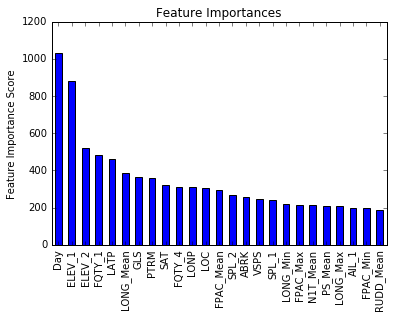

In [31]:
feat_imp_1[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

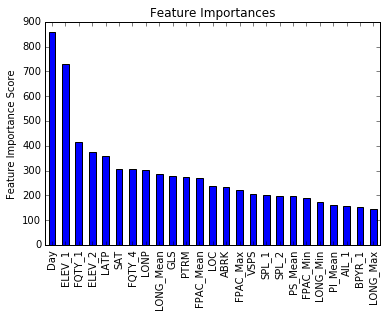

In [32]:
feat_imp_2[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')